## Three Observable trends:
    1. Treatments with either Capomulin or Ramicane result in the greatest decrease of tumor volume over 45 days
    2. Mice treated with Capomulin or Ramicane increase their expected survival rate from <45% at 45 days (Placebo) to >80%
    3. Most of the drug treatments results in less metastatic sites at 45 days as compared to placebo

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

mouse_df = pd.DataFrame(mouse_data)
clinical_df = pd.DataFrame(clinical_data)

#249 unique mice
#1 mouse had two drug treatments: g989
#Found Duplicate mouse print(pd.concat(g for _, g in mouse_df.groupby("Mouse ID") if len(g) > 1))
#dropping mouse that was treated with two different drugs

mouse_df = mouse_df.drop_duplicates(subset=['Mouse ID'], keep=False)

# Combine the data into a single dataset
pyma_data = pd.merge(clinical_df, mouse_df, on="Mouse ID", how="outer")

pyma_data = pyma_data.dropna(axis=0, subset=['Drug']) #remove row where if there is any 'NaN' value in column 'Drug'

# Display the data table for preview
pyma_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
tumor_vol_time_mean_df = pyma_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].agg(['mean']).reset_index()

tumor_vol_time_mean_df = tumor_vol_time_mean_df.rename(columns={'mean':'Tumor Volume (mm3)'})
# Preview DataFrame
tumor_vol_time_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
tumor_vol_time_sem_df = pyma_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].agg(['sem']).reset_index()

tumor_vol_time_sem_df = tumor_vol_time_sem_df.rename(columns={'sem':'Tumor Volume (mm3)'})
# Preview DataFrame
tumor_vol_time_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_sem_pivot = tumor_vol_time_sem_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_mean_pivot = tumor_vol_time_mean_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334


In [5]:
tumor_mean_pivot.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

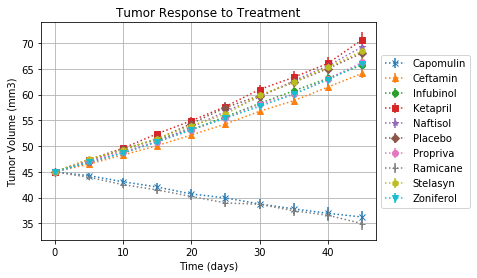

In [6]:
# Generate the Plot (with Error Bars)
drugs = tuple(tumor_mean_pivot.columns)
markers = ['x', '^', '8', 's', '*', 'D', 'o', '+', 'h', 'v']
timepoints = tuple(tumor_mean_pivot.index)

for drug, marker in zip(drugs, markers):
    plt.errorbar(timepoints, tuple(tumor_mean_pivot[drug]), yerr=tuple(tumor_sem_pivot[drug]), marker=marker, linestyle=':')

major_ticks = np.arange(0, 50, 10)
plt.xticks(major_ticks)
plt.title("Tumor Response to Treatment")
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim([-2,47])
plt.legend(drugs, loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

# Save the Figure
plt.savefig('Tumor_Treatment_Response.png', bbox_inches='tight')

In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
Met_Site_time_mean_df = pyma_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].agg(['mean']).reset_index()
Met_Site_time_mean_df = Met_Site_time_mean_df.rename(columns={'mean' : 'Metastatic Sites'})
# Preview DataFrame
Met_Site_time_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
Met_Site_time_sem_df = pyma_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].agg(['sem']).reset_index()
Met_Site_time_sem_df = Met_Site_time_sem_df.rename(columns={'sem' : 'Metastatic Sites'})
# Preview DataFrame
Met_Site_time_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
Met_Site_mean_pivot = Met_Site_time_mean_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
Met_Site_sem_pivot = Met_Site_time_sem_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
Met_Site_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118


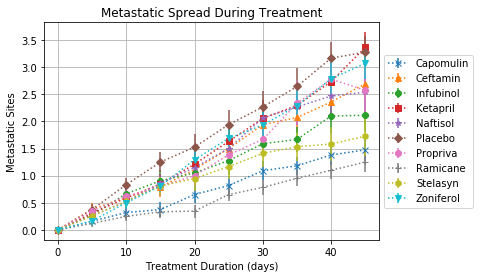

In [11]:
# Generate the Plot (with Error Bars)
drugs = tuple(Met_Site_mean_pivot.columns)
markers = ['x', '^', '8', 's', '*', 'D', 'o', '+', 'h', 'v']
timepoints = tuple(Met_Site_mean_pivot.index)

for drug, marker in zip(drugs, markers):
    plt.errorbar(timepoints, tuple(Met_Site_mean_pivot[drug]), yerr=tuple(Met_Site_sem_pivot[drug]), marker=marker, linestyle=':')

major_ticks = np.arange(0, 50, 10)
plt.xticks(major_ticks)
plt.title("Metastatic Spread During Treatment")
plt.xlabel('Treatment Duration (days)')
plt.ylabel('Metastatic Sites')
plt.xlim([-2,47])
plt.legend(drugs, loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

# Save the Figure
plt.savefig('Metastatic_Spread.png', bbox_inches='tight')
# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
mouse_count_df = pyma_data.groupby(['Drug', 'Timepoint'])['Mouse ID'].agg(['count']).reset_index()

# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_pivot = mouse_count_df.pivot(index='Timepoint', columns='Drug', values='count')

# Preview the Data Frame
mouse_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17


In [14]:
mouse_percent_pivot = mouse_count_pivot.copy()

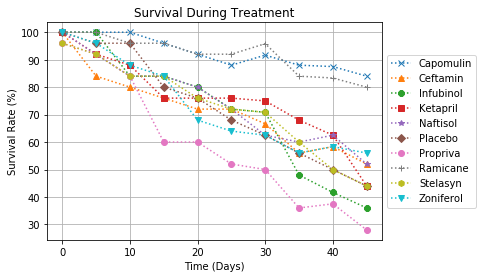

In [15]:
# Generate the Plot (Accounting for percentages)
drugs = tuple(mouse_count_pivot.columns)
markers = ['x', '^', '8', 's', '*', 'D', 'o', '+', 'h', 'v']
timepoints = tuple(mouse_count_pivot.index)
original_pop = tuple(mouse_count_pivot.iloc[0, :])
counter = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

for original, c in zip(original_pop, counter):
    values = tuple(mouse_count_pivot.iloc[c, :])
    percentages = [(x/original)*100 for x in values]
    mouse_percent_pivot.iloc[c, :] = percentages

for drug, marker in zip(drugs, markers):
    plt.plot(timepoints, mouse_percent_pivot[drug], marker=marker, linestyle=":")
    
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")
plt.legend(drugs, loc='center left', bbox_to_anchor=(1, 0.5))
major_ticks = np.arange(0, 50, 10)
plt.xticks(major_ticks)
plt.grid()
# Save the Figure
plt.savefig('Survival_Rates.png', bbox_inches='tight')
# Show the Figure
plt.show()

In [16]:
tumor_vol_pivot = tumor_vol_time_mean_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_vol_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334


## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
original_vol = tuple(tumor_vol_pivot.iloc[0, :])
final_vol = tuple(tumor_vol_pivot.iloc[9, :])
drugs = tuple(tumor_vol_pivot.columns)

percent_vol_change = []

for o, f in zip(original_vol, final_vol):
    change_per = round(((f - o) / o) * 100 , 2)
    percent_vol_change.append(change_per)

percent_info = {
    'Drug' : drugs,
    'Percent Tumor Change' : percent_vol_change
}
# Display the data to confirm
tumor_change_df = pd.DataFrame(percent_info).set_index('Drug').sort_values(by='Percent Tumor Change', ascending=True)
tumor_change_df

,Percent Tumor Change
Drug,
Ramicane,-22.32
Capomulin,-19.48
Ceftamin,42.52
Infubinol,46.12
Zoniferol,46.58
Propriva,47.24
Placebo,51.30
Stelasyn,52.09
Naftisol,53.92


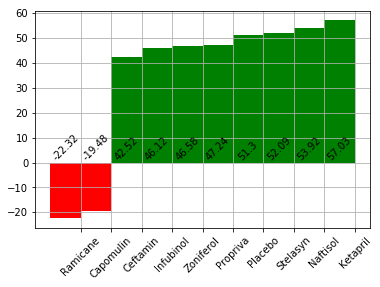

In [64]:
# Store all Relevant Percent Changes into a Tuple
percent_changes = tuple(tumor_change_df['Percent Tumor Change'])
drugs = tuple(tumor_change_df.index)
counter = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
x_axis = np.arange(len(drugs))

# Orient widths. Add labels, tick marks, etc. 
for drug, change, c in zip (drugs, percent_changes, counter):
    if int(percent_changes[c]) > 0:
        plt.bar(drugs[c], percent_changes[c], width=-1 , align='edge', color='g')
    else:
        plt.bar(drugs[c], percent_changes[c], width=-1 , align='edge', color='r')
plt.xticks(rotation=45)
plt.grid()

for x, y in zip(x_axis, percent_changes):
    plt.text(x - 0.5, 0, y, ha='center', va='bottom', rotation=45)

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()